In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt 

from sklearn import metrics

In [2]:
# df=pd.read_csv("ped1.csv")
df_train = pd.read_csv (r"C:\Users\nazmu\OneDrive\Documents\ped2l.csv")


display(df_train.head())
display(df_train.tail())

,dec,V1,V2,V3,V4,V5,V6,V7,V8
0,1,3,4,3,4,3,3,3,3
1,1,1,1,1,1,2,4,2,4
2,1,3,4,4,4,4,4,3,4
3,1,3,4,4,4,4,4,3,4
4,1,1,1,1,1,2,1,2,4


,dec,V1,V2,V3,V4,V5,V6,V7,V8
677,1,2,3,3,3,3,3,1,3
678,1,3,4,3,3,3,3,3,3
679,1,3,3,1,3,1,1,3,3
680,1,3,3,4,4,3,4,4,4
681,1,2,4,1,4,4,3,3,3


In [3]:
# var_columns = [c for c in df_train.columns if c not in ('dec')]

# X = df_train.loc[:, var_columns]
# y = df_train.loc[:, 'dec']

X = df_train.drop('dec', axis = 1)
y = df_train.dec



X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((477, 8), (205, 8), (477,), (205,))

### Initial Model

In [89]:
num_trees = 150

model_rf_in = RandomForestClassifier(n_estimators=num_trees,
                                  max_depth=5,
                                  class_weight='balanced',random_state=42)
model_rf_in.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=150,
                       random_state=42)

### Evaluation of Initial Model

In [90]:
y_train_pred = model_rf_in.predict(X_train)
y_valid_pred = model_rf_in.predict(X_valid)

print('AUC Train: {:.4f}\nAUC Valid = {:.4f}'.format(metrics.roc_auc_score(y_train, y_train_pred),
                                                     metrics.roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.9633
AUC Valid = 0.8462


In [91]:
print("Train set Accuracy (F1): ", f1_score(y_train, model_rf_in.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_valid, model_rf_in.predict(X_valid), average='weighted'))

Train set Accuracy (F1):  0.9916142557651991
Test set Accuracy (F1):  0.9788145472832422


### RandomizedSearchCV

In [92]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [93]:
n_estimators_list = list(range(10,220,50))
criterion_list = ['gini', 'entropy']
max_depth_list = list(range(5,41,10))
max_depth_list.append(None)
min_samples_split_list = [x/1000 for x in list(range(5, 41, 10))]
min_samples_leaf_list = [x/1000 for x in list(range(5, 41, 10))]
max_features_list = ['sqrt', 'log2']

params_grid = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list
}

num_combinations = 1
for k in params_grid.keys(): num_combinations *= len(params_grid[k])

print('Number of combinations = ', num_combinations)
params_grid

Number of combinations =  1600


{'n_estimators': [10, 60, 110, 160, 210],
 'criterion': ['gini', 'entropy'],
 'max_depth': [5, 15, 25, 35, None],
 'min_samples_split': [0.005, 0.015, 0.025, 0.035],
 'min_samples_leaf': [0.005, 0.015, 0.025, 0.035],
 'max_features': ['sqrt', 'log2']}

In [94]:
# def my_roc_auc_score(model, X_train, y_train): return metrics.roc_auc_score(y_train, model.predict(X_train))

model_rf = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
                              param_distributions=params_grid,
                              n_iter=50,
                              cv=5,
                              scoring='accuracy',
                              return_train_score=True,
                              verbose=4)

model_rf.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=0.025, min_samples_split=0.005, n_estimators=60; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=0.025, min_samples_split=0.005, n_estimators=60; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=0.025, min_samples_split=0.005, n_estimators=60; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=0.025, min_samples_split=0.005, n_estimators=60; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=0.025, min_samples_split=0.005, n_estimators=60; total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.015, min_samples_split=0.025, n_estimators=60; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 15, 25, 35, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [0.005, 0.015,
                                                             0.025, 0.035],
                                        'min_samples_split': [0.005, 0.015,
                                                              0.025, 0.035],
                                        'n_estimators': [10, 60, 110, 160,
                                                         210]},
                   return_train_score=True, scoring='accuracy', verbose=4)

In [95]:
model_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 0.005,
 'min_samples_leaf': 0.005,
 'max_features': 'sqrt',
 'max_depth': 15,
 'criterion': 'gini'}

In [96]:
df_cv_results = pd.DataFrame(model_rf.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                           'param_n_estimators', 'param_min_samples_split','param_min_samples_leaf',
                           'param_max_features', 'param_max_depth','param_criterion']]
df_cv_results.sort_values('rank_test_score', inplace=True)
df_cv_results[:20]

,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion
2,1,0.983246,0.994234,110,0.005,0.005,sqrt,15,gini
30,1,0.983246,0.994234,160,0.005,0.005,sqrt,None,entropy
9,1,0.983246,0.993185,110,0.015,0.005,log2,35,entropy
12,1,0.983246,0.992662,160,0.015,0.005,log2,None,gini
18,1,0.983246,0.993187,210,0.005,0.005,sqrt,15,entropy
33,6,0.981140,0.993185,60,0.005,0.005,log2,None,entropy
36,6,0.981140,0.989521,110,0.025,0.005,log2,25,entropy
21,6,0.981140,0.992662,110,0.015,0.005,sqrt,None,entropy
17,6,0.981140,0.987947,10,0.015,0.005,log2,5,entropy
47,10,0.979035,0.988473,60,0.025,0.005,log2,35,entropy


### GridSearchCV

In [151]:
n_estimators_list = [50,100,250,500,1000]
criterion_list = ['gini']
max_depth_list = [35,75,95,None]
min_samples_split_list = [0.001, 0.005]
min_samples_leaf_list = [0.001, 0.005]
max_features_list = ['log2','sqrt']

params_grid = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list
}

num_combinations = 1
for k in params_grid.keys(): num_combinations *= len(params_grid[k])

print('Number of combinations = ', num_combinations)
params_grid

Number of combinations =  160


{'n_estimators': [50, 100, 250, 500, 1000],
 'criterion': ['gini'],
 'max_depth': [35, 75, 95, None],
 'min_samples_split': [0.001, 0.005],
 'min_samples_leaf': [0.001, 0.005],
 'max_features': ['log2', 'sqrt']}

In [166]:
# def my_roc_auc_score(model, X_train, y_train): return metrics.roc_auc_score(y_train, model.predict(X_train))

model_rf = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
                        param_grid=params_grid,
                        cv=5,
                        scoring='recall',
                        return_train_score=True,
                        verbose=4)

model_rf.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=50; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=50; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=50; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=50; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=50; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=100; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=35, max_feature

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [35, 75, 95, None],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.001, 0.005],
                         'min_samples_split': [0.001, 0.005],
                         'n_estimators': [50, 100, 250, 500, 1000]},
             return_train_score=True, scoring='recall', verbose=4)

In [154]:
df_cv_results = pd.DataFrame(model_rf.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                           'param_n_estimators', 'param_min_samples_split','param_min_samples_leaf',
                           'param_max_features', 'param_max_depth','param_criterion']]
df_cv_results.sort_values('rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion
86,1,0.995506,0.997767,100,0.005,0.001,log2,95,gini
100,1,0.995506,0.997210,50,0.001,0.001,sqrt,95,gini
101,1,0.995506,0.997767,100,0.001,0.001,sqrt,95,gini
102,1,0.995506,0.997767,250,0.001,0.001,sqrt,95,gini
104,1,0.995506,0.997767,1000,0.001,0.001,sqrt,95,gini
...,...,...,...,...,...,...,...,...,...
135,153,0.991011,0.994418,50,0.005,0.005,log2,None,gini
90,153,0.991011,0.994418,50,0.001,0.005,log2,95,gini
50,153,0.991011,0.994418,50,0.001,0.005,log2,75,gini
55,153,0.991011,0.994418,50,0.005,0.005,log2,75,gini


### Best Parameters

In [155]:
model_rf.best_params_

{'criterion': 'gini',
 'max_depth': 35,
 'max_features': 'log2',
 'min_samples_leaf': 0.001,
 'min_samples_split': 0.001,
 'n_estimators': 100}

### Final Random Forest Model

In [7]:
model_rf_fin = RandomForestClassifier(class_weight='balanced',
                                      criterion='gini',
                                      max_depth=35,
                                      max_features='log2',
                                      min_samples_leaf=0.001,
                                      min_samples_split=0.001,
                                      n_estimators=100, random_state=42)
model_rf_fin.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=35,
                       max_features='log2', min_samples_leaf=0.001,
                       min_samples_split=0.001, random_state=42)

### AUC of Final Model

In [8]:
y_train_pred_fin = model_rf_fin.predict(X_train)
y_valid_pred_fin = model_rf_fin.predict(X_valid)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred_fin),
                                                    roc_auc_score(y_valid, y_valid_pred_fin)))

AUC Train: 0.9989
AUC Valid: 0.8462


### F1 score of Final Model

In [158]:
print("Train set Accuracy (F1): ", f1_score(y_train, model_rf_fin.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_valid, model_rf_fin.predict(X_valid), average='weighted'))

Train set Accuracy (F1):  0.9958723190710022
Test set Accuracy (F1):  0.9788145472832422


### F1 Score of Initial Model

In [159]:
print("Train set Accuracy (F1): ", f1_score(y_train, model_rf_in.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_valid, model_rf_in.predict(X_valid), average='weighted'))

Train set Accuracy (F1):  0.9916142557651991
Test set Accuracy (F1):  0.9788145472832422


### Confusion Matrix of Final Model

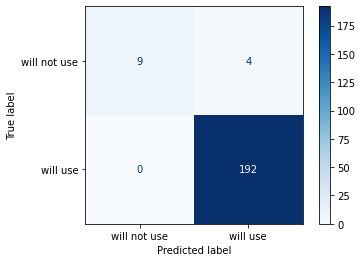

In [160]:
plot_confusion_matrix(model_rf_fin, 
                      X_valid, 
                      y_valid, 
                      display_labels=["will not use", "will use"],
                      cmap='Blues')
plt.show()

### Confusion Matrix of Initial Model

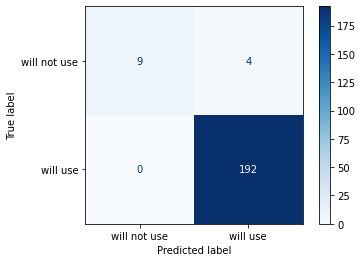

In [161]:
plot_confusion_matrix(model_rf_in, 
                      X_valid, 
                      y_valid, 
                      display_labels=["will not use", "will use"],
                      cmap='Blues')
plt.show()

### Alternative AUC Evaluation of Final RF model

In [162]:
y_pred_DT = model_rf_fin.predict(X_valid)

confusion_matrix: 
 [[  9   4]
 [  0 192]]
Accuracy:  0.9804878048780488
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.98      1.00      0.99       192

    accuracy                           0.98       205
   macro avg       0.99      0.85      0.90       205
weighted avg       0.98      0.98      0.98       205



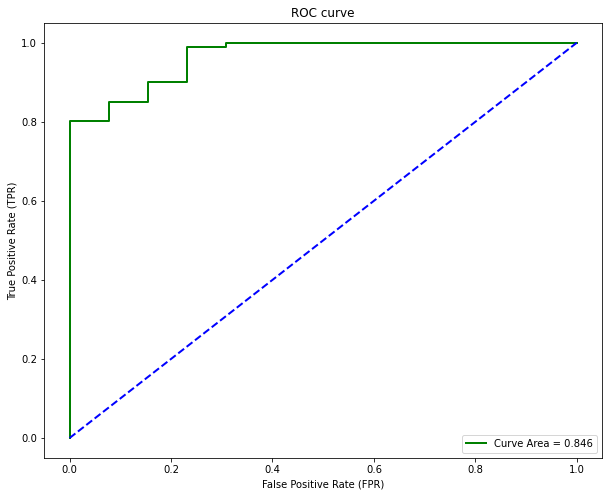

In [163]:
confusion_matrix_dt = confusion_matrix(y_valid, y_pred_DT)
print('confusion_matrix: \n', confusion_matrix_dt)


print('Accuracy: ', accuracy_score(y_valid, y_pred_DT))

print(classification_report(y_valid, y_pred_DT))

fpr, tpr, thr = roc_curve(y_valid, model_rf_fin.predict_proba(X_valid)[:,1])
auc = roc_auc_score(y_valid, y_pred_DT)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### Alternative AUC Evaluation of initial RF model

In [164]:
y_pred_DT_in = model_rf_in.predict(X_valid)

confusion_matrix: 
 [[  9   4]
 [  0 192]]
Accuracy:  0.9804878048780488
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.98      1.00      0.99       192

    accuracy                           0.98       205
   macro avg       0.99      0.85      0.90       205
weighted avg       0.98      0.98      0.98       205



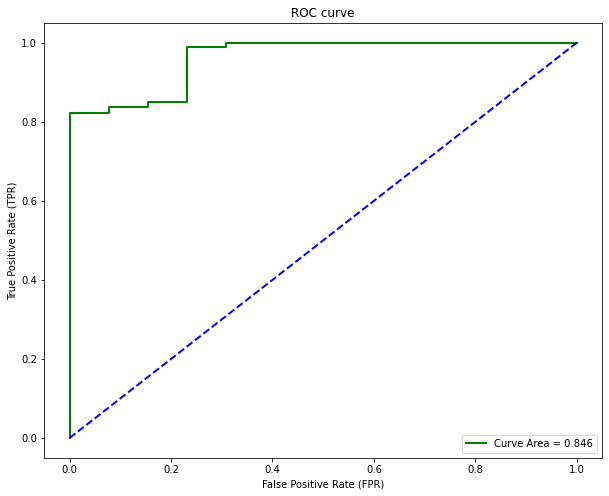

In [165]:
confusion_matrix_dt_in = confusion_matrix(y_valid, y_pred_DT_in)
print('confusion_matrix: \n', confusion_matrix_dt_in)


print('Accuracy: ', accuracy_score(y_valid, y_pred_DT_in))

print(classification_report(y_valid, y_pred_DT_in))

fpr, tpr, thr = roc_curve(y_valid, model_rf_in.predict_proba(X_valid)[:,1])
auc = roc_auc_score(y_valid, y_pred_DT_in)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()